In [4]:
%autosave 3600

Autosaving every 3600 seconds


In [1]:
from sotavento import Data
from datetime import datetime
from numpy import array
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

%matplotlib inline

#Data gathering
fileName = 'Sotavento Historical Data.csv'
multivariate = False
forecast = Data(fileName, multivariate)
data = forecast.dataPrep()

In [5]:
data.head()

,energy,wind_speed,wind_direction,week
timestamp,,,,
2004-07-01 01:00:00,0.00,2.11,7,27
2004-07-01 02:00:00,62.31,3.27,348,27
2004-07-01 03:00:00,410.00,4.58,340,27
2004-07-01 04:00:00,27.65,4.08,343,27
2004-07-01 05:00:00,217.69,3.93,343,27


In [6]:
data.describe()

,energy,wind_speed,wind_direction,week
count,129829.000000,129829.000000,129829.000000,129829.000000
mean,3048.277237,6.314705,166.690531,26.664513
std,3748.290366,3.296160,99.177049,15.154139
min,0.000000,0.000000,0.000000,1.000000
25%,17.770000,4.180000,82.000000,13.000000
50%,1440.010000,5.860000,163.000000,27.000000
75%,4825.940000,8.040000,251.000000,40.000000
max,17288.830000,38.620000,359.000000,53.000000


In [7]:
data.corr()

,energy,wind_speed,wind_direction,week
energy,1.000000,0.798225,0.047018,-0.030432
wind_speed,0.798225,1.000000,0.144422,-0.042418
wind_direction,0.047018,0.144422,1.000000,0.004693
week,-0.030432,-0.042418,0.004693,1.000000


In [2]:
#Split i train and test dataset
startTrain = '2009'
endTrain = '2018'
startTest = '1-Jan-2019'
endTest = '2019-04-22'
if not multivariate:
    #data.drop(labels = ['wind_speed', 'wind_direction','week'], axis=1, inplace = True)
    data_x = data.loc[:, data.columns == 'energy']
    data_y = data_x #data.loc[startTrain:endTrain, data.columns = 'energy']
else:
    data_x = data.loc[:, data.columns != 'energy']
    data_y = data.loc[:, data.columns == 'energy']
    
n_out = 8    
train_x, test_x, train_y, test_y, scaler_x, scaler_y = forecast.split_dataset(data_x, data_y, startTrain, 
                                                                              endTrain, startTest, endTest, 
                                                                              n_out)


In [3]:

train_x_flat = [item for step in train_x[:,:,0] for item in step]

In [4]:

df = pd.DataFrame(train_x_flat)

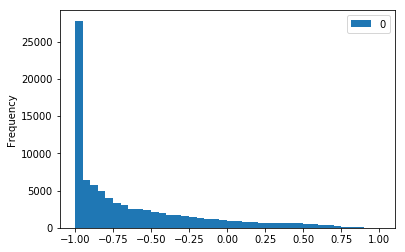

In [5]:
df.plot.hist(bins=40)

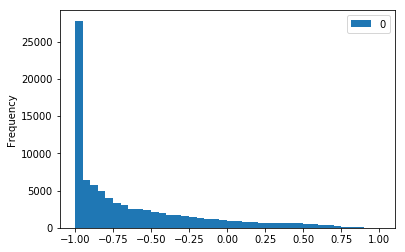

In [6]:
train_x_flat = [item for step in train_y for item in step]
df_y = pd.DataFrame(train_x_flat)
df_y.plot.hist(bins=40)

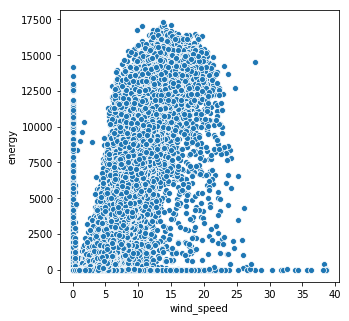

In [7]:
a4_dims = (5, 5)
fig, axs = plt.subplots(figsize=a4_dims)
sns.scatterplot(x='wind_speed',y='energy',data=data)

## Persistant model

In [8]:
train_per, test_per = data['2015':'2018']['energy'], data['2019']['energy']

p=1 RMSE:1350.691
p=2 RMSE:1943.927
p=3 RMSE:2326.600
p=4 RMSE:2626.504
p=5 RMSE:2873.293
p=6 RMSE:3063.012
p=7 RMSE:3226.669
p=8 RMSE:3388.404
p=9 RMSE:3528.054
p=10 RMSE:3645.406
p=11 RMSE:3741.995
p=12 RMSE:3826.681
Score RMSE:3826.681


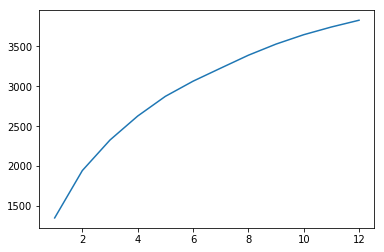

In [9]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot

persistence_values = range(1,13)
scores = list()
# find 
for p in persistence_values:
    #walk forward validation
    history = [x for x in train_per]
    predictions = list()
    for i in range(len(test_per)):
        #make prediction
        yhat = history[-p]
        predictions.append(yhat)
        #observations
        history.append(test_per[i])
        
    #report performance
    rmse = sqrt(mean_squared_error(test_per, predictions))
    scores.append(rmse)
    print('p=%d RMSE:%.3f' % (p,rmse))
    
        #calculate overall RMSE
score = sqrt(mean_squared_error(test_per, predictions))

print('Score RMSE:%.3f' % (score))

#plot scores over persistence values
pyplot.plot(persistence_values, scores)
pyplot.show()